In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import pandas as pd

sns.set_theme(style='ticks', font_scale=1.5, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [2]:
data = pd.read_csv('data.csv', header=None)
data.columns = data.iloc[0]  
data = data[1:]  
data

,scene,probe_n,sps
1,shapes,0,78
2,shapes,4,713
3,shapes,8,682
4,shapes,16,653
5,shapes,32,638
6,shapes,64,462
7,shapes,128,223
8,shapes,256,60
9,shapes,512,20
10,wall,0,72


In [3]:
unique_scenes = data['scene'].unique()
print(unique_scenes)

['shapes' 'wall' 'door']


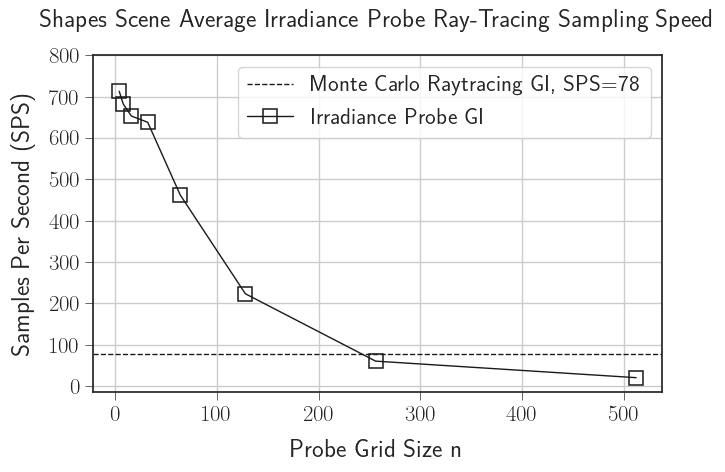

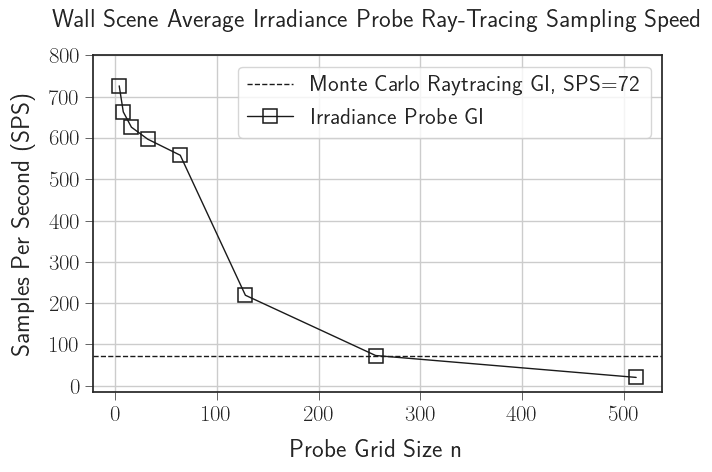

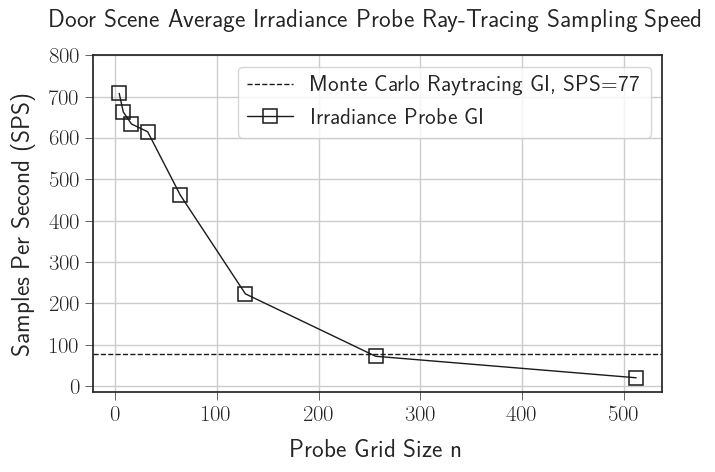

In [4]:
for scene in unique_scenes:
    
    rt = data[(data['scene'] == scene) & (data['probe_n'] == '0')]['sps'].astype(int).values[0]
    probe_n = data[(data['scene'] == scene) & (data['probe_n'] != '0')]['probe_n'].astype(int)
    sps = data[(data['scene'] == scene) & (data['probe_n'] != '0')]['sps'].astype(int)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axhline(y=rt, color='k', linestyle='--', linewidth=1, label=f'Monte Carlo Raytracing GI, SPS={rt}')

    sns.lineplot(
        x=probe_n,
        y=sps,
        marker='s',  # Square marker
        markerfacecolor='none',
        markeredgecolor='k',
        markeredgewidth=1.1,
        markersize=10,
        color='k',
        linewidth=1,
        ax=ax,
        label='Irradiance Probe GI'
    )
    ax.set_title(f"{scene.capitalize()} Scene Average Irradiance Probe Ray-Tracing Sampling Speed", pad=20)
    ax.set_xlabel('Probe Grid Size n', labelpad=10)
    ax.set_ylabel('Samples Per Second (SPS)', labelpad=10)
    # ax.set_xticks(probe_n)  # Set x-axis ticks to match probe_n values
    # ax.set_xticklabels(probe_n)  # Use probe_n values as tick labels

    ax.grid(True)
    ax.legend()
    ax.tick_params(width=0.5)
    # ax.spines['top'].set_linewidth(0.5)
    # ax.spines['right'].set_linewidth(0.5)
    # ax.spines['left'].set_linewidth(0.5)
    # ax.spines['bottom'].set_linewidth(0.5)

    ax.set_yticks(range(0, max(sps) + 100, 100))
    
    plt.tight_layout()
    # Format the file name to have no capitals, spaces, or special symbols
    formatted_title = ax.get_title().lower().replace(' ', '_').replace('-', '_').replace(':', '').replace(',', '').replace('.', '')
    plt.savefig(f'plot/{formatted_title}.pdf', transparent=True)
    plt.show()